In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

## Preprocessing

In [ ]:
# shape of train and test dataset
print('train',df_train.shape)
print('test',df_test.shape)

train (891, 12)
test (418, 11)


In [ ]:
# finding extra column in train dataset
df_train.columns.values[np.where(np.isin(df_train.columns,df_test.columns)==False)]
# df_train.columns.difference(df_test.columns) 

array(['Survived'], dtype=object)

In [ ]:
# TrainingFeature datatypes:
print(f"Integer feature: {list(filter(lambda x:df_train[x].dtype=='int64',list(df_train.columns)))}")
print(f"Integer feature: {list(filter(lambda x:df_train[x].dtype=='float',list(df_train.columns)))}")
print(f"Integer feature: {list(filter(lambda x:df_train[x].dtype=='object',list(df_train.columns)))}")

Integer feature: ['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch']
Integer feature: ['Age', 'Fare']
Integer feature: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [ ]:
# checking statistics
df_train.describe()
# Gives insights:
  ## On an average 38 % people survived
  ## Age column has some null values .(range newborn to 80 yrs)
  ## Fare  On an average 31/32 dollars (7.9 to 512)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Missing Values Analysis

In [ ]:
pd.concat([df_train.isna().sum().sort_values(ascending=False),
df_train.isna().mean().round(2).sort_values(ascending=False)],axis=1,keys=['cnt','per'])

,cnt,per
Cabin,687,0.77
Age,177,0.20
Embarked,2,0.00
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00
Parch,0,0.00


In [ ]:
df_all=pd.concat([df_train,df_test],sort=True,ignore_index=True)

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


## Handling null values

#### Cabin column - Create a new column Deck and drop cabin column

In [ ]:
df_all['Deck']=df_all['Cabin'].apply(lambda x:'M' if pd.isnull(x) else x[0])
ival=df_all[df_all['Deck']=='T'].index[0]

In [ ]:
df_all.loc[ival,'Deck']='A'

In [ ]:
df_all['Deck'].value_counts()

M    1014
C      94
B      65
D      46
E      41
A      23
F      21
G       5
Name: Deck, dtype: int64

In [ ]:
#df_all.drop('Cabin',axis=1,inplace=True)

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Embarked     1307 non-null   object 
 2   Fare         1308 non-null   float64
 3   Name         1309 non-null   object 
 4   Parch        1309 non-null   int64  
 5   PassengerId  1309 non-null   int64  
 6   Pclass       1309 non-null   int64  
 7   Sex          1309 non-null   object 
 8   SibSp        1309 non-null   int64  
 9   Survived     891 non-null    float64
 10  Ticket       1309 non-null   object 
 11  Deck         1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### Age column - Our original code to replace with categorical median 

In [ ]:
df_all['Age']=df_all.groupby(['Pclass','Sex'])['Age'].apply(lambda x:x.fillna(x.median()))

In [ ]:
df_all['Age'].isna().sum()

0

#### Embarked column:

In [ ]:
df_all[df_all['Embarked'].isnull()]
df_all[(df_all['Pclass']==1)&(df_all['Fare']<=80.0)&(df_all['SibSp']==0)]['Embarked'].value_counts()

S    88
C    58
Name: Embarked, dtype: int64

In [ ]:
df_all['Embarked'].fillna('S',inplace=True)

#### Fare column

In [ ]:
df_all[df_all['Fare'].isnull()] 

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,M


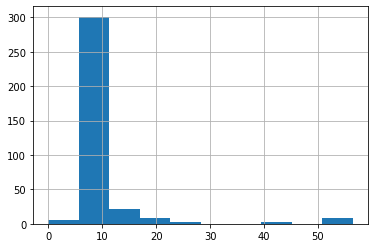

In [ ]:
df_all[(df_all['Pclass']==3)&(df_all['Embarked']=='S')&(df_all['SibSp']==0)]['Fare'].hist() # skewed

In [ ]:
median_fare=df_all[(df_all['Pclass']==3)&(df_all['Embarked']=='S')&(df_all['SibSp']==0)]['Fare'].median()
df_all['Fare'].fillna(median_fare,inplace=True)

In [ ]:
df_all.isna().sum()

Age              0
Embarked         0
Fare             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
Deck             0
Farebin          0
Title            0
Age_class        0
dtype: int64

## Feature Engineering

### Binning numerical features

#### Age field

In [ ]:
df_all['Age'] = df_all['Age'].astype(int)
df_all.loc[ df_all['Age'] <= 11, 'Age'] = 0
df_all.loc[(df_all['Age'] > 11) & (df_all['Age'] <= 18), 'Age'] = 1
df_all.loc[(df_all['Age'] > 18) & (df_all['Age'] <= 22), 'Age'] = 2
df_all.loc[(df_all['Age'] > 22) & (df_all['Age'] <= 27), 'Age'] = 3
df_all.loc[(df_all['Age'] > 27) & (df_all['Age'] <= 33), 'Age'] = 4
df_all.loc[(df_all['Age'] > 33) & (df_all['Age'] <= 40), 'Age'] = 5
df_all.loc[(df_all['Age'] > 40) & (df_all['Age'] <= 66), 'Age'] = 6
df_all.loc[df_all['Age'] > 66, 'Age'] = 6

In [ ]:
df_all[df_all['Survived'].isna()==False]['Age'].value_counts()

3    200
6    169
4    137
2    134
5    112
1     71
0     68
Name: Age, dtype: int64

#### Fare field

In [ ]:
df_all['Fare']=df_all['Fare'].astype(int)
df_all['Farebin']=pd.qcut(df_all['Fare'],6)

In [ ]:
# Our way of doing it
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
one_hot_encoder=preprocessing.OneHotEncoder()

df_all['Fare']=label_encoder.fit_transform(df_all['Farebin'])
df_all.drop(columns='Farebin',inplace=True)

In [ ]:
df_all.loc[df_all['Fare'] <= 7.91, 'Fare'] = 0
df_all.loc[(df_all['Fare'] > 7.91) & (df_all['Fare'] <= 14.454), 'Fare'] = 1
df_all.loc[(df_all['Fare'] > 14.454) & (df_all['Fare'] <= 31), 'Fare']   = 2
df_all.loc[(df_all['Fare'] > 31) & (df_all['Fare'] <= 99), 'Fare']   = 3
df_all.loc[(df_all['Fare'] > 99) & (df_all['Fare'] <= 250), 'Fare']   = 4
df_all.loc[ df_all['Fare'] > 250, 'Fare'] = 5
df_all['Fare'] = df_all['Fare'].astype(int)

In [ ]:
df_all['Fare'].value_counts()

0    337
2    331
1    311
3    246
4     67
5     17
Name: Fare, dtype: int64

### Encoding Categorical features

#### Sex field

In [ ]:
df_all['Sex'].head(2)

0      male
1    female
Name: Sex, dtype: object

In [ ]:
genders = {"male": 0, "female": 1}
df_all['Sex'] = df_all['Sex'].map(genders)

In [ ]:
df_all['Sex'].value_counts()

0    843
1    466
Name: Sex, dtype: int64

#### Title field

In [ ]:
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df_all['Title']=df_all['Title'].str.strip()
df_all['Title']=df_all['Title'].map(titles)

In [ ]:
df_all['Title'].value_counts()

 Mr        757
 Miss      260
 Mrs       197
 Master     61
Rare        34
Name: Title, dtype: int64

#### Embarked field

In [ ]:
ports = {"S": 0, "C": 1, "Q": 2}
df_all['Embarked'] = df_all['Embarked'].map(ports)

In [ ]:
df_all['Embarked'].value_counts()

0    916
1    270
2    123
Name: Embarked, dtype: int64

#### Deck field

In [ ]:
df_all['Deck'].value_counts()

8    1014
3      94
2      65
4      46
5      41
1      23
6      21
7       5
Name: Deck, dtype: int64

In [ ]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "M": 8}
df_all['Deck']=df_all['Deck'].map(deck)

### Creating new fields

#### Age_Class- Age* p_class

In [ ]:
df_all['Age_class']=df_all['Age']*df_all['Pclass']

#### Title from Name field

In [ ]:
df_all['Title']=df_all['Name'].map(lambda x:x.split('.')[0].split(',')[1])

In [ ]:
lst=list(df_all['Title'].value_counts().index[4:])

In [ ]:
df_all['Title_new']=df_all['Title'].map(lambda x:'Rare' if x in lst else x)

In [ ]:
df_all['Title_new'].isna().sum()

0

In [ ]:
df_all.drop(columns=['Name','Title'],inplace=True)
df_all.rename(columns={'Title_new':'Title'},inplace=True)

#### Relatives field

In [ ]:
df_all['relatives']=df_all['SibSp']+df_all['Parch']

## Final look of datset

In [ ]:
df_all.head()
drop_cols=['Ticket','Farebin']

In [ ]:
df_all.drop(columns=drop_cols,axis=1,inplace=True)

In [ ]:
df_all.isna().sum()

Age              0
Embarked         0
Fare             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Deck             0
Title            0
Age_class        0
relatives        0
dtype: int64

In [ ]:
df_all.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Deck,Title,Age_class,relatives
0,2,0,0,0,1,3,0,1,0.0,8,1,6,1
1,5,1,3,0,2,1,1,1,1.0,3,3,5,1
2,3,0,0,0,3,3,1,0,1.0,8,2,9,0
3,5,0,3,0,4,1,1,1,1.0,3,3,5,1
4,5,0,1,0,5,3,0,0,0.0,8,1,15,0


In [ ]:
df_all[df_all['Survived'].isna()==True]

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Deck,Title,Age_class,relatives
891,5,2,0,0,892,3,0,0,NaN,8,1,15,0
892,6,0,0,0,893,3,1,1,NaN,8,3,18,1
893,6,2,1,0,894,2,0,0,NaN,8,1,12,0
894,3,0,1,0,895,3,0,0,NaN,8,1,9,0
895,2,0,1,1,896,3,1,1,NaN,8,3,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,1,0,1305,3,0,0,NaN,8,1,9,0
1305,5,1,4,0,1306,1,1,0,NaN,3,5,5,0
1306,5,0,0,0,1307,3,0,0,NaN,8,1,15,0
1307,3,0,1,0,1308,3,0,0,NaN,8,1,9,0


In [ ]:
df_train=df_all.loc[:890]

In [ ]:
df_test=df_all.loc[891:].drop(['Survived'], axis=1)

In [ ]:
df_train.columns

Index(['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp',
       'Survived', 'Deck', 'Title', 'Age_class', 'relatives'],
      dtype='object')

In [ ]:
df_test.columns

Index(['Age', 'Embarked', 'Fare', 'Parch', 'PassengerId', 'Pclass', 'Sex',
       'SibSp', 'Deck', 'Title', 'Age_class', 'relatives'],
      dtype='object')

In [ ]:
df_train.drop(columns='PassengerId',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_train['Survived']=df_train['Survived'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_train.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Deck,Title,Age_class,relatives
0,2,0,0,0,3,0,1,0,8,1,6,1
1,5,1,3,0,1,1,1,1,3,3,5,1
2,3,0,0,0,3,1,0,1,8,2,9,0
3,5,0,3,0,1,1,1,1,3,3,5,1
4,5,0,1,0,3,0,0,0,8,1,15,0


## Training ML ALgos

In [ ]:
X=df_train.drop(columns='Survived')
y=df_train['Survived'].values

In [ ]:
from sklearn import model_selection as ms
X_train,X_test,y_train,y_test=ms.train_test_split(X,y,test_size=0.25,random_state=42)

### SGD Algo

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

In [ ]:
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
print(acc_sgd)

81.44


In [ ]:
from sklearn import metrics
#y_pred=sgd.predict(X_test)
print(f'confusion matrix: {metrics.confusion_matrix(y_test,y_pred)}')
print(f'precision:{metrics.precision_score(y_test,y_pred)}')
print(f'recall:{metrics.recall_score(y_test,y_pred)}')
print(f'f1 score:{metrics.f1_score(y_test,y_pred)}')
print(f'roc_auc:{metrics.roc_auc_score(y_test,y_pred)}')
#print(f'oob:{sgd.oob_score}')

confusion matrix: [[117  17]
 [ 23  66]]
precision:0.7951807228915663
recall:0.7415730337078652
f1 score:0.7674418604651162
roc_auc:0.8073536810330371


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)

In [ ]:
acc_sgd = round(logr.score(X_train, y_train) * 100, 2)
print(acc_sgd)

81.89


In [ ]:
from sklearn import metrics
#y_pred=sgd.predict(X_test)
print(f'confusion matrix: {metrics.confusion_matrix(y_test,y_pred)}')
print(f'precision:{metrics.precision_score(y_test,y_pred)}')
print(f'recall:{metrics.recall_score(y_test,y_pred)}')
print(f'f1 score:{metrics.f1_score(y_test,y_pred)}')
print(f'roc_auc:{metrics.roc_auc_score(y_test,y_pred)}')
#print(f'oob:{sgd.oob_score}')

confusion matrix: [[111  23]
 [ 21  68]]
precision:0.7472527472527473
recall:0.7640449438202247
f1 score:0.7555555555555554
roc_auc:0.7962015763877244


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dect = DecisionTreeClassifier()
dect.fit(X_train, y_train)
y_pred = dect.predict(X_test)

In [ ]:
acc_sgd = round(dect.score(X_train, y_train) * 100, 2)
print(acc_sgd)

92.81


In [ ]:
from sklearn import metrics
#y_pred=sgd.predict(X_test)
print(f'confusion matrix: {metrics.confusion_matrix(y_test,y_pred)}')
print(f'precision:{metrics.precision_score(y_test,y_pred)}')
print(f'recall:{metrics.recall_score(y_test,y_pred)}')
print(f'f1 score:{metrics.f1_score(y_test,y_pred)}')
print(f'roc_auc:{metrics.roc_auc_score(y_test,y_pred)}')
#print(f'oob:{sgd.oob_score}')

confusion matrix: [[116  18]
 [ 23  66]]
precision:0.7857142857142857
recall:0.7415730337078652
f1 score:0.7630057803468209
roc_auc:0.803622337749455


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randf = RandomForestClassifier()
randf.fit(X_train, y_train)
y_pred = randf.predict(X_test)

In [ ]:
acc_sgd = round(randf.score(X_train, y_train) * 100, 2)
print(acc_sgd)

92.81


In [ ]:
from sklearn import metrics
#y_pred=sgd.predict(X_test)
print(f'confusion matrix: {metrics.confusion_matrix(y_test,y_pred)}')
print(f'precision:{metrics.precision_score(y_test,y_pred)}')
print(f'recall:{metrics.recall_score(y_test,y_pred)}')
print(f'f1 score:{metrics.f1_score(y_test,y_pred)}')
print(f'roc_auc:{metrics.roc_auc_score(y_test,y_pred)}')
#print(f'oob:{sgd.oob_score}')

confusion matrix: [[115  19]
 [ 21  68]]
precision:0.7816091954022989
recall:0.7640449438202247
f1 score:0.7727272727272727
roc_auc:0.8111269495220528


### K Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kmodel = KNeighborsClassifier()
kmodel.fit(X_train, y_train)
y_pred = kmodel.predict(X_test)

In [ ]:
acc_sgd = round(kmodel.score(X_train, y_train) * 100, 2)
print(acc_sgd)

84.28


In [ ]:
from sklearn import metrics
#y_pred=sgd.predict(X_test)
print(f'confusion matrix: {metrics.confusion_matrix(y_test,y_pred)}')
print(f'precision:{metrics.precision_score(y_test,y_pred)}')
print(f'recall:{metrics.recall_score(y_test,y_pred)}')
print(f'f1 score:{metrics.f1_score(y_test,y_pred)}')
print(f'roc_auc:{metrics.roc_auc_score(y_test,y_pred)}')
#print(f'oob:{sgd.oob_score}')

confusion matrix: [[112  22]
 [ 20  69]]
precision:0.7582417582417582
recall:0.7752808988764045
f1 score:0.7666666666666667
roc_auc:0.8055508971993962


### XgBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
xgmodel = GradientBoostingClassifier()
xgmodel.fit(X_train, y_train)
y_pred = xgmodel.predict(X_test)

In [ ]:
acc_sgd = round(dect.score(X_train, y_train) * 100, 2)
print(acc_sgd)

92.81


In [ ]:
from sklearn import metrics
#y_pred=sgd.predict(X_test)
print(f'confusion matrix: {metrics.confusion_matrix(y_test,y_pred)}')
print(f'precision:{metrics.precision_score(y_test,y_pred)}')
print(f'recall:{metrics.recall_score(y_test,y_pred)}')
print(f'f1 score:{metrics.f1_score(y_test,y_pred)}')
print(f'roc_auc:{metrics.roc_auc_score(y_test,y_pred)}')
#print(f'oob:{sgd.oob_score}')

confusion matrix: [[116  18]
 [ 19  70]]
precision:0.7954545454545454
recall:0.7865168539325843
f1 score:0.7909604519774012
roc_auc:0.8260942478618146


### Ran Forest with hyper parameters


In [ ]:
from sklearn.ensemble import RandomForestClassifier
randf = RandomForestClassifier(criterion='gini',n_estimators=30,max_depth=7,
  min_samples_split=6,min_samples_leaf=6,max_features='auto',oob_score=True,)
randf.fit(X_train, y_train)
y_pred = randf.predict(X_test)

In [ ]:
acc_sgd = round(randf.score(X_train, y_train) * 100, 2)
print(acc_sgd)

85.18


In [ ]:
from sklearn import metrics
#y_pred=sgd.predict(X_test)
print(f'confusion matrix: {metrics.confusion_matrix(y_test,y_pred)}')
print(f'precision:{metrics.precision_score(y_test,y_pred)}')
print(f'recall:{metrics.recall_score(y_test,y_pred)}')
print(f'f1 score:{metrics.f1_score(y_test,y_pred)}')
print(f'roc_auc:{metrics.roc_auc_score(y_test,y_pred)}')
print(f'oob:{randf.oob_score_}')

confusion matrix: [[120  14]
 [ 25  64]]
precision:0.8205128205128205
recall:0.7191011235955056
f1 score:0.7664670658682635
roc_auc:0.8073117558276035
oob:0.8218562874251497
